# Visualize

## Import

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import numpy as np
import os
from datetime import datetime
from matplotlib import patheffects
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import plotly.graph_objects as go


In [122]:
# Pfad
TEMPLATE_PATH = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "_templates"))

In [123]:
# Daten einlesen
wahlen_df = pd.read_pickle(os.path.join(TEMPLATE_PATH, "wahlen.pickle"))
wordcount_df = pd.read_pickle(os.path.join(TEMPLATE_PATH, "wordcount.pickle"))

In [124]:
# Liste der Parteifarben
parteifarben = {'cdu': 'black', 'spd': 'red', 'grüne': 'green','grünen': 'green',
                'fdp': '#DAA520', 'linke': 'purple', 'afd': 'blue'}

## Inspect

In [125]:
wordcount_df.head() 

,date,word,paper,count,month,quarter
0,2021-04-01,afd,faz,2,2021-04,2021Q2
1,2021-04-01,afd,tagesspiegel,1,2021-04,2021Q2
2,2021-04-01,afd,uebermedien,5,2021-04,2021Q2
3,2021-04-01,cdu,berliner,1,2021-04,2021Q2
4,2021-04-01,cdu,dlf,6,2021-04,2021Q2


In [126]:
wahlen_df.head()

,date,cdu,spd,grüne,fdp,linke,afd,bsw,quarter,month
0,2021-04-16,31,14,21,9,7,11,0,2021Q2,2021-04
1,2021-05-07,25,14,26,10,7,11,0,2021Q2,2021-05
2,2021-05-21,24,14,25,11,7,11,0,2021Q2,2021-05
3,2021-06-10,28,15,22,10,7,11,0,2021Q2,2021-06
4,2021-06-25,29,14,22,10,7,10,0,2021Q2,2021-06


## CDU und SPD Plott

Dieses Skript erstellt einen Plot, der die Häufigkeit bestimmter Wörter 
(Wordcount) im Zeitverlauf mit den Zustimmungswerten von politischen Parteien 
(Politbarometer) vergleicht. Zusätzlich werden wichtige Ereignisse markiert.

In [127]:
# Liste der Wörter, die behalten werden sollen
words_to_keep = ["grünen", "afd"]
wordkeep = ["spd", "cdu"]
# Filtern des DataFrames, um nur die gewünschten Wörter zu behalten
kleine_parties = wordcount_df[wordcount_df["word"].isin(words_to_keep)]
große_parties = wordcount_df[wordcount_df["word"].isin(wordkeep)]

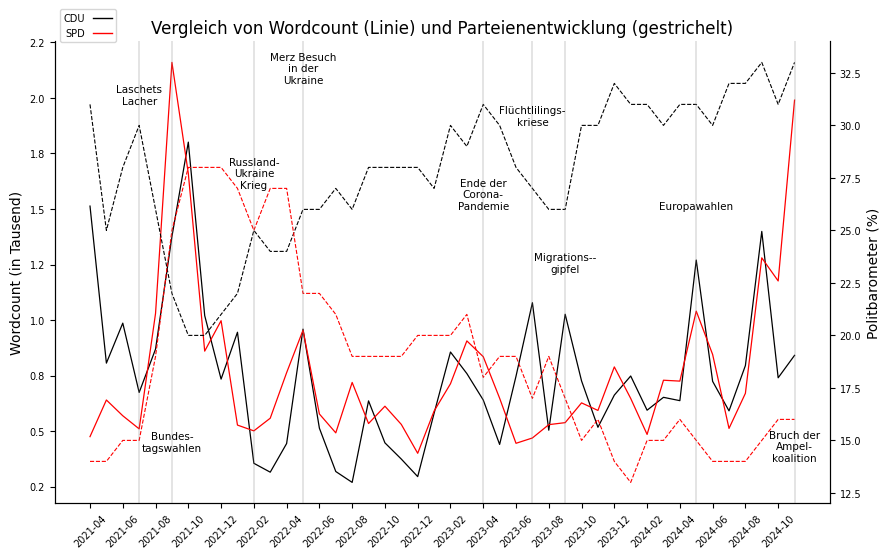

In [128]:
# Erstellen der Plot-Figur
plt.figure(figsize=(10, 6))  # Definiert die Größe der gesamten Plot-Figur
ax1 = plt.gca()  # Erstellt die erste y-Achse (linke Achse)

# Daten vorbereiten für den ersten Plot (Wordcount)
df_grouped_wordcount = pd.DataFrame()  # Initialisiere ein leeres DataFrame für Wordcount-Daten
for word in alt_parteien['word'].unique():  # Iteriere über jedes einzigartige Wort in der 'word'-Spalte
    # Aggregiere die 'count'-Werte pro Monat für das aktuelle Wort
    temp_df = alt_parteien[alt_parteien['word'] == word].groupby('month').agg({'count': 'sum'}).reset_index()  
    temp_df['word'] = word  # Füge die aktuelle Wortzuordnung hinzu
    df_grouped_wordcount = pd.concat([df_grouped_wordcount, temp_df], ignore_index=True)  # Füge die Daten zusammen

# Erster Plot (wordcount)
for word in df_grouped_wordcount['word'].unique():  # Iteriere über alle Wörter in den vorbereiteten Daten
    temp_df = df_grouped_wordcount[df_grouped_wordcount['word'] == word]  # Filtere Daten für das aktuelle Wort
    color = parteifarben.get(word, 'black')  # Hole die Farbe aus der 'parteifarben'-Datenstruktur, Standard: Schwarz
    ax1.plot(temp_df['month'], temp_df['count'],linewidth=0.9, linestyle='-', color=color)  # Plotte die Daten für das Wort

ax1.set_xlabel('')  # Entfernt die Beschriftung der x-Achse

# Werte der linken Y-Achse skalieren (Wordcount)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x * 0.001:.1f}"))  # Verschiebt das Komma drei Stellen nach links
ax1.set_ylabel('Wordcount (in Tausend)')  # Beschriftung anpassen
ax1.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der y-Achse auf Schwarz
ax1.set_xticks(df_grouped_wordcount['month'].unique())  # Setzt die Monate als x-Achsenticks
ax1.set_xticklabels(df_grouped_wordcount['month'].unique(), rotation=45)  # Dreht die Labels um 45 Grad

# Jedes zweite Datum auf der x-Achse anzeigen
unique_months = df_grouped_wordcount['month'].unique()  # Liste aller einzigartigen Monate
ax1.set_xticks(unique_months[::2])  # Zeigt nur jeden zweiten Monat
ax1.set_xticklabels(unique_months[::2], rotation=45)  # Dreht die Labels erneut um 45 Grad


# Daten vorbereiten für den zweiten Plot (wahlen)
df_grouped_parties = wahlen_df.groupby('month').first().reset_index()  # Aggregiere die Wahlen-Daten nach Monat

# Zweiter Plot (wahlen) mit zweiter y-Achse
ax2 = ax1.twinx()  # Erstellt eine zweite y-Achse (rechte Achse)
party_lines = []  # Liste zum Speichern der Linien für die Legende
for column in ['cdu', 'spd']:  # Iteriere über die Parteien
    color = parteifarben.get(column, 'black')  # Hole die Farbe der Partei
    # Plotte die Werte der Partei 
    line, = ax2.plot(df_grouped_parties['month'], df_grouped_parties[column],
                     linewidth=0.8, linestyle="--", label=column.upper(), color=color) 
    party_lines.append(line)  # Speichere die Linie für die Legende



ax2.set_ylabel('Politbarometer (%)')  # Beschriftet die rechte y-Achse
ax2.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der rechten y-Achse auf Schwarz

# Schriftgröße der Zahlen an den Achsen anpassen
ax1.tick_params(axis='y', labelsize=7)  # Linke Y-Achse
ax2.tick_params(axis='y', labelsize=7)  # Rechte Y-Achse
ax1.tick_params(axis='x', labelsize=7)  # X-Achse

# Achsen anpassen
ax2.spines["top"].set_linewidth(0)  # Entferne die obere Linie
ax1.spines["top"].set_linewidth(0)  # Entferne die obere Linie

# Legende ändern
# Erstelle Legenden-Elemente mit den Farben und Labels der Linien
legend_elements = [Line2D([0], [0], color=line.get_color(), lw=1, label=line.get_label()) for line in party_lines]  
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0, 1.08), markerfirst=False, fontsize=7)  # Platziert die Legende

# Events markieren
events = [("2021-07", "Laschets\nLacher", 31), 
          ("2021-09", "Bundes-\ntagswahlen", 14.5),
          ("2023-04", "Ende der\nCorona-\nPandemie", 26), 
          ("2022-02", "Russland-\nUkraine\nKrieg", 27),
          ("2022-05", "Merz Besuch\nin der\nUkraine", 32),
          ("2023-07", "Flüchtlilings-\nkriese", 30),
          ("2023-09", "Migrations--\ngipfel", 23),
          ("2024-05", "Europawahlen", 26),
          ("2024-11", "Bruch der\nAmpel-\nkoalition", 14)]  # Definiert die Events

for event_x, event_label, y_position in events:  # Iteriere über die Events
    plt.axvline(x=event_x, color='grey', linestyle='-', linewidth=0.3)  # Zeichnet vertikale Linie für jedes Event
    text = plt.text(event_x, y_position, event_label, rotation=0, fontsize=7.5)  # Fügt Text an die Linie hinzu
    text.set_horizontalalignment('center')  # Zentriert den Text horizontal

# Plot
plt.title('Vergleich von Wordcount (Linie) und Parteienentwicklung (gestrichelt)')  # Setzt den Titel des Plots
plt.show()  # Zeigt den Plot an

## Grünen Afd Plott

Dieses Skript erstellt einen Plot, der die Häufigkeit bestimmter Wörter 
(Wordcount) im Zeitverlauf mit den Zustimmungswerten von politischen Parteien 
(Politbarometer) vergleicht. Zusätzlich werden wichtige Ereignisse markiert.

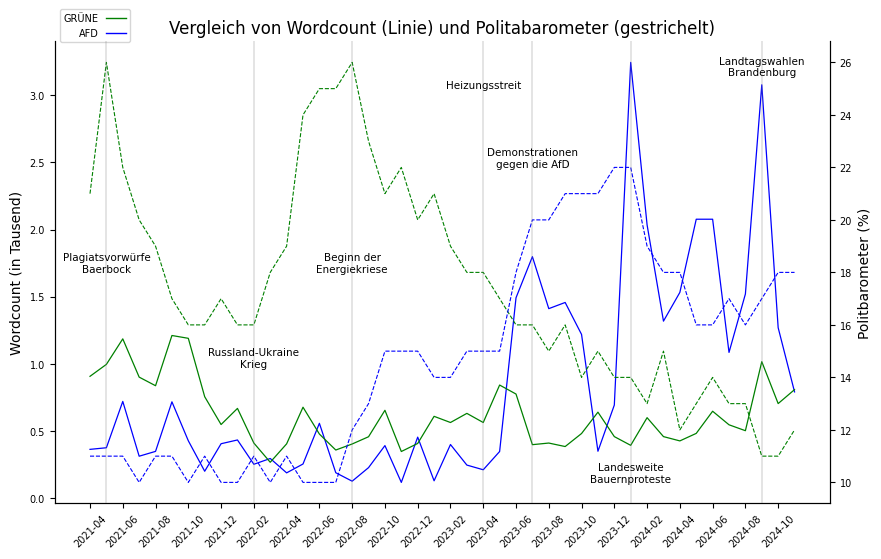

In [ ]:
# Erstellen der Plot-Figur
plt.figure(figsize=(10, 6))  # Definiert die Größe der Plot-Figur
ax1 = plt.gca()  # Erstellt die erste y-Achse (linke Achse)

# Daten vorbereiten für den ersten Plot (Wordcount)
df_grouped_wordcount = pd.DataFrame()  # Initialisiere ein leeres DataFrame für Wordcount-Daten
for word in neue_parteien['word'].unique():  # Iteriere über jedes einzigartige Wort in der 'word'-Spalte
    # Aggregiere die 'count'-Werte pro Monat für das aktuelle Wort
    temp_df = neue_parteien[neue_parteien['word'] == word].groupby('month').agg({'count': 'sum'}).reset_index()  
    temp_df['word'] = word  # Füge die aktuelle Wortzuordnung hinzu
    df_grouped_wordcount = pd.concat([df_grouped_wordcount, temp_df], ignore_index=True)  # Füge die Daten zusammen

# Erster Plot (Wörter)
for word in df_grouped_wordcount['word'].unique():  # Iteriere über alle Wörter in den vorbereiteten Daten
    temp_df = df_grouped_wordcount[df_grouped_wordcount['word'] == word]  # Filtere Daten für das aktuelle Wort
    color = parteifarben.get(word, 'black')  # Hole die Farbe aus der 'parteifarben'-Datenstruktur, Standard: Schwarz
    ax1.plot(temp_df['month'], temp_df['count'], linewidth=0.9,linestyle='-', color=color)  # Plotte die Daten für das Wort

ax1.set_xlabel('')  # Entfernt die Beschriftung der x-Achse
# Werte der linken Y-Achse skalieren (Wordcount)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x * 0.001:.1f}"))  # Verschiebt das Komma drei Stellen nach links
ax1.set_ylabel('Wordcount (in Tausend)')  # Beschriftung anpassen
ax1.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der y-Achse auf Schwarz
ax1.set_xticks(df_grouped_wordcount['month'].unique())  # Setzt die Monate als x-Achsenticks
ax1.set_xticklabels(df_grouped_wordcount['month'].unique(), rotation=45)  # Dreht die Labels um 45 Grad


# Anzeige von jedem zweiten Datum auf der x-Achse
unique_months = df_grouped_wordcount['month'].unique()  # Liste aller einzigartigen Monate
ax1.set_xticks(unique_months[::2])  # Zeigt nur jeden zweiten Monat
ax1.set_xticklabels(unique_months[::2], rotation=45)  # Dreht die Labels erneut um 45 Grad

# Daten vorbereiten für den zweiten Plot (wahlen)
df_grouped_parties = wahlen_df.groupby('month').first().reset_index()  # Aggregiere die Wahlen-Daten nach Monat

# Zweiter Plot (wahlen) mit zweiter y-Achse
ax2 = ax1.twinx()  # Erstellt eine zweite y-Achse (rechte Achse)
party_lines = []  # Liste zum Speichern der Linien für die Legende
for column in ['grüne', 'afd']:  # Iteriere über die Parteien
    color = parteifarben.get(column, 'black')  # Hole die Farbe der Partei
    # Plotte die Werte der Partei 
    line, = ax2.plot(df_grouped_parties['month'], df_grouped_parties[column],
                     linewidth=0.8, linestyle="--", label=column.upper(), color=color) 
    party_lines.append(line)  # Speichere die Linie für die Legende

ax2.set_ylabel('Politbarometer (%)')  # Beschriftet die rechte y-Achse
ax2.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der rechten y-Achse auf Schwarz

# Schriftgröße der Zahlen an den Achsen anpassen
ax1.tick_params(axis='y', labelsize=7)  # Linke Y-Achse
ax2.tick_params(axis='y', labelsize=7)  # Rechte Y-Achse
ax1.tick_params(axis='x', labelsize=7)  # X-Achse

ax2.spines["top"].set_linewidth(0)  # Entferne die obere Linie
ax1.spines["top"].set_linewidth(0)  # Entferne die obere Linie

# Legende ändern
# Erstelle Legenden-Elemente mit den Farben und Labels der Linien
legend_elements = [Line2D([0], [0], color=line.get_color(), lw=1, label=line.get_label()) for line in party_lines]  
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0, 1.08), markerfirst=False, fontsize=7)  # Platziert die Legende

# Events markieren
events = [("2021-05", "Plagiatsvorwürfe\nBaerbock", 18),
          ("2022-02", "Russland-Ukraine\nKrieg", 14.4),
          ("2023-04", "Heizungsstreit", 25),
          ("2023-07", "Demonstrationen\ngegen die AfD", 22),
          ("2022-08", "Beginn der\nEnergiekriese", 18),
          ("2024-01", "Landesweite\nBauernproteste", 10),
          ("2024-09", "Landtagswahlen\nBrandenburg", 25.5),
          ]  # Definiere die Events vb

for event_x, event_label, y_position in events:  # Iteriere über die Events
    plt.axvline(x=event_x, color='grey', linestyle='-', linewidth=0.3)  # Zeichnet vertikale Linie für jedes Event
    text = plt.text(event_x, y_position, event_label, rotation=0, fontsize=7.5)  # Fügt Text an die Linie hinzu
    text.set_horizontalalignment('center')  # Zentriert den Text horizontal

# Plot
plt.title('Vergleich von Wordcount (Linie) und Politabarometer (gestrichelt)')  # Setzt den Titel des Plots
plt.show()  # Zeigt den Plot an

In [130]:
# Spalte "grüne" in "grünen" umbenennen
wahlen_df = wahlen_df.rename(columns={"grüne": "grünen"})

In [139]:
# Beispiel-Ereignisse
events = [
    {"date": "2021-09", "label": "Bundestagswahlen"},
    {"date": "2022-02", "label": "Russland-Ukraine Krieg"},
    {"date": "2023-04", "label": "Heizungsstreit"},
    {"date": "2023-09", "label": "Migrationsgipfel"},
]

# Daten vorbereiten
df_grouped_wordcount = wordcount_df.groupby(["month", "word"])["count"].sum().reset_index()
df_grouped_parties = wahlen_df.groupby("month").first().reset_index()

# Farben für die Parteien
parteifarben = {
    "afd": "blue",
    "cdu": "black",
    "grünen": "green",
    "spd": "red",
}

# Interaktive Figur erstellen
fig = go.Figure()

# Ereignisse zuerst hinzufügen
for event in events:
    fig.add_trace(
        go.Scatter(
            x=[event["date"], event["date"]],
            y=[0, 3000],  # Passe die Y-Achse an deine Daten an
            mode="lines",
            name=event["label"],
            line=dict(color="grey", dash="dot"),
            hoverinfo="x+name",
        )
    )

# Wordcount-Daten hinzufügen
for word in ["afd", "cdu", "grünen", "spd"]:
    word_data = df_grouped_wordcount[df_grouped_wordcount["word"] == word]
    fig.add_trace(
        go.Scatter(
            x=word_data["month"],
            y=word_data["count"],
            mode="lines",
            name=f"Wordcount: {word.upper()}",
            line=dict(color=parteifarben.get(word, "gray")),
            yaxis="y1",
        )
    )

# Politbarometer-Daten hinzufügen
for column in ["afd", "cdu", "grünen", "spd"]:
    fig.add_trace(
        go.Scatter(
            x=df_grouped_parties["month"],
            y=df_grouped_parties[column],
            mode="lines",
            name=f"Politbarometer: {column.upper()}",
            line=dict(color=parteifarben.get(column, "gray"), dash="dash"),
            yaxis="y2",
        )
    )

# Layout der Grafik
fig.update_layout(
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(title="Wordcount", side="left"),
    yaxis2=dict(title="Politbarometer (%)", side="right", overlaying="y"),
    legend=dict(
        title="Legende",
        orientation="h",  # Horizontale Ausrichtung
        y=1.20,  # Position oberhalb der Grafik
        x=0.5,
        xanchor="center",
        font=dict(size=10),  # Schriftgröße der Legende
    ),
    template="plotly_white",
    height=600,
    width=1000,
)

# Grafik anzeigen
fig.show()

# Optional: Grafik als HTML speichern
fig.write_html("interaktive_visualisierung.html")

In [138]:
# Farben für die Parteien definieren
parteifarben = {
    "afd": "blue",
    "cdu": "black",
    "grünen": "green",
    "spd": "red",
}

# Daten für Wordcount vorbereiten
df_grouped_wordcount = wordcount_df.groupby(["month", "word"])["count"].sum().reset_index()

# Daten für Politbarometer vorbereiten
df_grouped_parties = wahlen_df.groupby("month").first().reset_index()

# Interaktive Figur erstellen
fig = go.Figure()

# Wordcount-Daten hinzufügen (linke Y-Achse)
for word in ["afd", "cdu", "grünen", "spd"]:
    word_data = df_grouped_wordcount[df_grouped_wordcount["word"] == word]
    fig.add_trace(
        go.Scatter(
            x=word_data["month"],
            y=word_data["count"],
            mode="lines",
            name=f"Wordcount: {word.upper()}",
            line=dict(color=parteifarben.get(word, "gray")),
            yaxis="y1",  # Linke Y-Achse
            hoverinfo="x+y+name"
        )
    )

# Politbarometer-Daten hinzufügen (rechte Y-Achse)
for column in ["afd", "cdu", "grünen", "spd"]:
    fig.add_trace(
        go.Scatter(
            x=df_grouped_parties["month"],
            y=df_grouped_parties[column],
            mode="lines",
            name=f"Politbarometer: {column.upper()}",
            line=dict(color=parteifarben.get(column, "gray"), dash="dash"),
            yaxis="y2",  # Rechte Y-Achse
            hoverinfo="x+y+name"
        )
    )

# Layout der Grafik definieren
fig.update_layout(
    
    xaxis=dict(title="Monat", tickangle=45),
    yaxis=dict(
        title="Wordcount",
        side="left",
        showgrid=True,
    ),
    yaxis2=dict(
        title="Politbarometer (%)",
        side="right",
        overlaying="y",
        showgrid=False,
    ),
    legend=dict(
        title="Legende",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template="plotly_white",
    height=600,
    width=1000,
)

# Interaktive Figur anzeigen
fig.show()



In [133]:
# Optional: Grafik als HTML speichern
fig.write_html("interaktive_visualisierung.html")